
#Sarcasm Detection on Airline Reviews - Data Preprocessing

This notebook demonstrates the steps for preprocessing a dataset for sarcasm detection in Airline Reviews using deep learning. The preprocessing steps include loading the dataset, cleaning the data, and preparing the data for model training.

#Dataset Overview
We are using a dataset of Airline Reviews which contains the following columns:

`Review`: The text of the YouTube comment.

`sarcasm`: The target label indicating whether the comment is sarcastic (1) or not (0).


Additional features related to airline information.

Let's load the dataset and take a look at its structure.

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/My Drive/Airline_Reviews_Labeled.csv'
  # Update with your dataset path
data = pd.read_csv(dataset_path)


class_distribution = data['sarcasm'].value_counts()
print(class_distribution)

minority_class_percentage = (class_distribution.min() / len(data)) * 100
print(minority_class_percentage)

majority_class_percentage = (class_distribution.max() / len(data)) * 100
print(majority_class_percentage)

Mounted at /content/drive
sarcasm
1    16548
0     6623
Name: count, dtype: int64
28.58314272150533
71.41685727849467


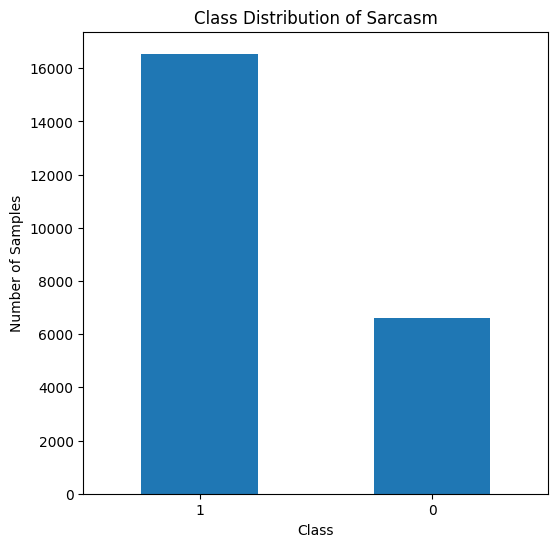

In [4]:
import matplotlib.pyplot as plt
# Plotting the class distribution
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Sarcasm')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0','Airline Name','Overall_Rating','Review_Title','Review Date',
    'Verified','Aircraft','Type Of Traveller','Route', 'Seat Type', 'Date Flown',
    'Seat Comfort','Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment',
    'Wifi & Connectivity', 'Value For Money','Recommended',
]

# Drop columns
data = data.drop(columns=columns_to_drop, errors='ignore')


Taking Subset of the Dateset

In [ ]:
# Randomly sample 8000 records
sampled_data = data.sample(n=12000, random_state=42)

Spliting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(sampled_data['Review'], sampled_data['sarcasm'], test_size=0.2, random_state=42)


In [ ]:
# Convert to DataFrame for preprocessing
train_data = pd.DataFrame({'text': X_train, 'label': y_train})

In [ ]:
# Convert to DataFrame for preprocessing
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# Data Visualization

In [ ]:
# Describe the dataset
print(train_data.describe())

             label
count  9600.000000
mean      0.716042
std       0.450940
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [ ]:
# Shape of the dataset
print(train_data.shape)

(9600, 2)


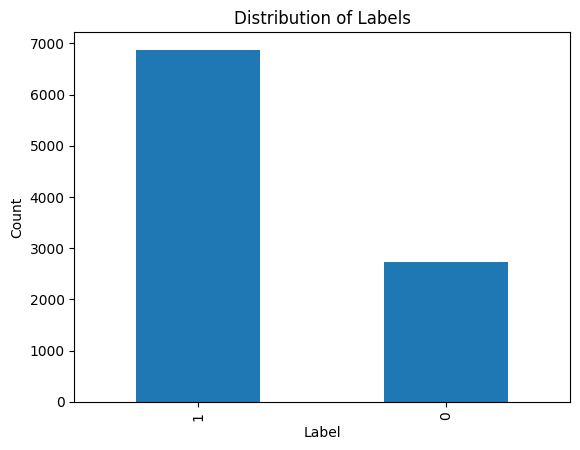

In [ ]:
import matplotlib.pyplot as plt
# Distribution of labels
train_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


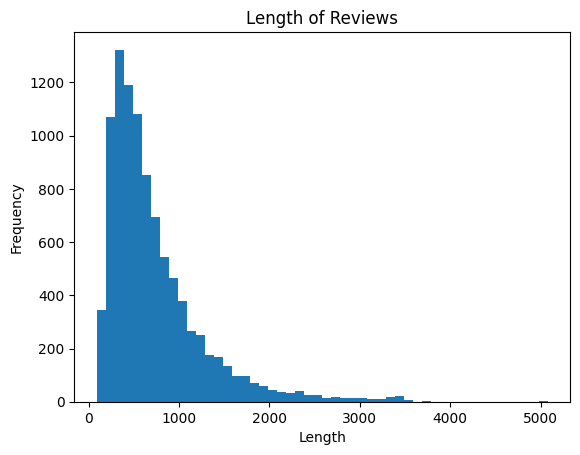

In [ ]:
import matplotlib.pyplot as plt

# Length of reviews
train_data['review_length'] = train_data['text'].apply(len)
plt.hist(train_data['review_length'], bins=50)
plt.title('Length of Reviews')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check for missing values
print(train_data.isnull().sum())


text             0
label            0
review_length    0
dtype: int64


In [ ]:
# Check for duplicates
print(train_data.duplicated().sum())

# Remove duplicates
train_data = train_data.drop_duplicates()


20


# Data Cleaning

In [ ]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Text Cleaning
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

train_data['clean_text'] = train_data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-20-b8df1234f44a>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


#Data Preprocessing

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_data['tokenized_text'] = train_data['clean_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (598 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
stop_words = set(stopwords.words('english'))
# Remove stop words
train_data['clean_text'] = train_data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
train_data['encoded_label'] = label_encoder.fit_transform(train_data['label'])


##Text Vecotorization

In [ ]:
from gensim.models import Word2Vec
import numpy as np
# Prepare data for Word2Vec
sentences = [text.split() for text in train_data['clean_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get Word2Vec vectors for the training data
train_data['word2vec'] = train_data['clean_text'].apply(lambda x: np.mean([word2vec_model.wv[word] for word in x.split() if word in word2vec_model.wv], axis=0))


## Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_data['word2vec'].tolist(), train_data['encoded_label'])


#Training and Testing Deep Learning Models

##1. Simple Neural Network

In [ ]:
# Importing necessary libraries for building the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# Convert labels to categorical one-hot encoding
num_classes = len(np.unique(y_resampled))
y_resampled_categorical = to_categorical(y_resampled, num_classes)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
model.save('text_classification_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_resampled, y_resampled_categorical)
print(f'Model accuracy: {accuracy:.2f}')


Epoch 1/10
344/344 [==============================] - 3s 4ms/step - loss: 0.4153 - accuracy: 0.8085 - val_loss: 0.4250 - val_accuracy: 0.8572
Epoch 2/10
344/344 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.8435 - val_loss: 0.3870 - val_accuracy: 0.8685
Epoch 3/10
344/344 [==============================] - 1s 3ms/step - loss: 0.3546 - accuracy: 0.8514 - val_loss: 0.4570 - val_accuracy: 0.8215
Epoch 4/10
344/344 [==============================] - 2s 5ms/step - loss: 0.3495 - accuracy: 0.8516 - val_loss: 0.3667 - val_accuracy: 0.8780
Epoch 5/10
344/344 [==============================] - 2s 6ms/step - loss: 0.3502 - accuracy: 0.8534 - val_loss: 0.4144 - val_accuracy: 0.8510
Epoch 6/10
344/344 [==============================] - 2s 6ms/step - loss: 0.3447 - accuracy: 0.8556 - val_loss: 0.3014 - val_accuracy: 0.9184
Epoch 7/10
344/344 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.8540 - val_loss: 0.4597 - val_accuracy: 0.8113
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


429/429 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8646
Model accuracy: 0.86


In [ ]:
# Preprocess the testing data
X_test_clean = X_test.apply(clean_text)
X_test_tokenized = X_test_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_vectors = X_test_tokenized.apply(lambda x: np.mean([word2vec_model.wv[word] for word in x.split() if word in word2vec_model.wv], axis=0))

# Ensure all vectors are the same length
X_test_vectors = np.array(X_test_vectors.tolist())

# Convert labels to categorical one-hot encoding if necessary
y_test_categorical = to_categorical(y_test, num_classes)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_vectors, y_test_categorical)
print(f'Test Accuracy: {accuracy:.2f}')


<ipython-input-20-b8df1234f44a>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


75/75 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8629
Test Accuracy: 0.86


##2. LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_resampled.shape[1], 1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for LSTM
X_resampled_lstm = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Train the model
lstm_history = lstm_model.fit(X_resampled_lstm, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
lstm_model.save('lstm_text_classification_model.h5')

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_resampled_lstm, y_resampled_categorical)
print(f'LSTM Model accuracy: {lstm_accuracy:.2f}')


Epoch 1/10
344/344 [==============================] - 82s 232ms/step - loss: 0.5156 - accuracy: 0.7393 - val_loss: 0.4281 - val_accuracy: 0.8692
Epoch 2/10
344/344 [==============================] - 92s 269ms/step - loss: 0.4018 - accuracy: 0.8222 - val_loss: 0.5935 - val_accuracy: 0.7643
Epoch 3/10
344/344 [==============================] - 90s 262ms/step - loss: 0.3940 - accuracy: 0.8210 - val_loss: 0.6013 - val_accuracy: 0.7403
Epoch 4/10
344/344 [==============================] - 70s 204ms/step - loss: 0.3807 - accuracy: 0.8344 - val_loss: 0.3701 - val_accuracy: 0.8692
Epoch 5/10
344/344 [==============================] - 50s 147ms/step - loss: 0.3808 - accuracy: 0.8342 - val_loss: 0.5735 - val_accuracy: 0.7497
Epoch 6/10
344/344 [==============================] - 54s 156ms/step - loss: 0.3696 - accuracy: 0.8393 - val_loss: 0.5468 - val_accuracy: 0.7811
Epoch 7/10
344/344 [==============================] - 54s 156ms/step - loss: 0.3685 - accuracy: 0.8387 - val_loss: 0.5873 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


429/429 [==============================] - 22s 51ms/step - loss: 0.4614 - accuracy: 0.8006
LSTM Model accuracy: 0.80


In [ ]:
# Assuming X_test_vectors is a sequence data like [num_samples, num_timesteps, num_features]
# Reshape if necessary
X_test_vectors = np.reshape(X_test_vectors, (X_test_vectors.shape[0], X_test_vectors.shape[1], 1))

# Evaluate the LSTM model on the testing data
loss, accuracy = lstm_model.evaluate(X_test_vectors, y_test_categorical)
print(f'LSTM Model Accuracy: {accuracy:.2f}')


75/75 [==============================] - 10s 135ms/step - loss: 0.3269 - accuracy: 0.8600
LSTM Model Accuracy: 0.86


##3. BiLSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Define the Bidirectional LSTM model architecture
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(128), input_shape=(X_resampled.shape[1], 1)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for Bidirectional LSTM
X_resampled_bilstm = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Train the model
bilstm_history = bilstm_model.fit(X_resampled_bilstm, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
bilstm_model.save('bilstm_text_classification_model.h5')

# Evaluate the model
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_resampled_bilstm, y_resampled_categorical)
print(f'Bidirectional LSTM Model accuracy: {bilstm_accuracy:.2f}')


Epoch 1/10
344/344 [==============================] - 100s 270ms/step - loss: 0.4756 - accuracy: 0.7785 - val_loss: 0.4172 - val_accuracy: 0.8791
Epoch 2/10
344/344 [==============================] - 89s 259ms/step - loss: 0.4111 - accuracy: 0.8121 - val_loss: 0.5707 - val_accuracy: 0.7709
Epoch 3/10
344/344 [==============================] - 89s 260ms/step - loss: 0.3916 - accuracy: 0.8224 - val_loss: 0.5708 - val_accuracy: 0.7588
Epoch 4/10
344/344 [==============================] - 90s 262ms/step - loss: 0.3878 - accuracy: 0.8287 - val_loss: 0.4091 - val_accuracy: 0.8583
Epoch 5/10
344/344 [==============================] - 88s 256ms/step - loss: 0.3782 - accuracy: 0.8334 - val_loss: 0.6115 - val_accuracy: 0.7454
Epoch 6/10
344/344 [==============================] - 92s 268ms/step - loss: 0.3724 - accuracy: 0.8381 - val_loss: 0.5216 - val_accuracy: 0.8022
Epoch 7/10
344/344 [==============================] - 93s 270ms/step - loss: 0.3647 - accuracy: 0.8415 - val_loss: 0.3976 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


429/429 [==============================] - 37s 87ms/step - loss: 0.3797 - accuracy: 0.8405
Bidirectional LSTM Model accuracy: 0.84


In [ ]:
# Assuming X_test_vectors is a sequence data like [num_samples, num_timesteps, num_features]
# Reshape if necessary
X_test_vectors = np.reshape(X_test_vectors, (X_test_vectors.shape[0], X_test_vectors.shape[1], 1))

# Evaluate the BiLSTM model on the testing data
loss, accuracy = bilstm_model.evaluate(X_test_vectors, y_test_categorical)
print(f'BiLSTM Model Accuracy: {accuracy:.2f}')



75/75 [==============================] - 12s 155ms/step - loss: 0.3139 - accuracy: 0.8504
BiLSTM Model Accuracy: 0.85


## 4. CNN

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Define the CNN model architecture
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_resampled.shape[1], 1)))
cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for CNN
X_resampled_cnn = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Train the model
cnn_history = cnn_model.fit(X_resampled_cnn, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
cnn_model.save('cnn_text_classification_model.h5')

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_resampled_cnn, y_resampled_categorical)
print(f'CNN Model accuracy: {cnn_accuracy:.2f}')


Epoch 1/10
344/344 [==============================] - 5s 13ms/step - loss: 0.3670 - accuracy: 0.8367 - val_loss: 0.5879 - val_accuracy: 0.7461
Epoch 2/10
344/344 [==============================] - 3s 8ms/step - loss: 0.3361 - accuracy: 0.8553 - val_loss: 0.6654 - val_accuracy: 0.6969
Epoch 3/10
344/344 [==============================] - 3s 8ms/step - loss: 0.3293 - accuracy: 0.8558 - val_loss: 0.3054 - val_accuracy: 0.9075
Epoch 4/10
344/344 [==============================] - 2s 7ms/step - loss: 0.3274 - accuracy: 0.8601 - val_loss: 0.2798 - val_accuracy: 0.9188
Epoch 5/10
344/344 [==============================] - 2s 7ms/step - loss: 0.3230 - accuracy: 0.8632 - val_loss: 0.3486 - val_accuracy: 0.8765
Epoch 6/10
344/344 [==============================] - 4s 11ms/step - loss: 0.3196 - accuracy: 0.8643 - val_loss: 0.3452 - val_accuracy: 0.8736
Epoch 7/10
344/344 [==============================] - 3s 10ms/step - loss: 0.3227 - accuracy: 0.8607 - val_loss: 0.3952 - val_accuracy: 0.8488
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


429/429 [==============================] - 1s 3ms/step - loss: 0.3145 - accuracy: 0.8723
CNN Model accuracy: 0.87


In [ ]:
# Assuming X_test_vectors is a sequence data like [num_samples, num_timesteps, num_features]
# Reshape if necessary
X_test_vectors = np.reshape(X_test_vectors, (X_test_vectors.shape[0], X_test_vectors.shape[1], 1))

# Evaluate the model on the testing data
loss, accuracy = cnn_model.evaluate(X_test_vectors, y_test_categorical)
print(f'Test Accuracy: {accuracy:.2f}')


75/75 [==============================] - 0s 5ms/step - loss: 0.2939 - accuracy: 0.8717
Test Accuracy: 0.87


##5. RNN

In [ ]:
from keras.layers import SimpleRNN

# Define the RNN model architecture
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape=(X_resampled.shape[1], 1)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for RNN
X_resampled_rnn = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Train the model
rnn_history = rnn_model.fit(X_resampled_rnn, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
rnn_model.save('rnn_text_classification_model.h5')

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_resampled_rnn, y_resampled_categorical)
print(f'RNN Model accuracy: {rnn_accuracy:.2f}')


Epoch 1/10
344/344 [==============================] - 24s 59ms/step - loss: 0.4587 - accuracy: 0.7861 - val_loss: 0.3715 - val_accuracy: 0.9100
Epoch 2/10
344/344 [==============================] - 14s 41ms/step - loss: 0.4239 - accuracy: 0.8083 - val_loss: 0.5296 - val_accuracy: 0.8237
Epoch 3/10
344/344 [==============================] - 13s 37ms/step - loss: 0.3952 - accuracy: 0.8250 - val_loss: 0.3505 - val_accuracy: 0.9158
Epoch 4/10
344/344 [==============================] - 13s 37ms/step - loss: 0.3848 - accuracy: 0.8357 - val_loss: 0.3347 - val_accuracy: 0.9046
Epoch 5/10
344/344 [==============================] - 13s 39ms/step - loss: 0.3847 - accuracy: 0.8310 - val_loss: 0.5553 - val_accuracy: 0.7559
Epoch 6/10
344/344 [==============================] - 12s 36ms/step - loss: 0.3870 - accuracy: 0.8323 - val_loss: 0.2986 - val_accuracy: 0.9031
Epoch 7/10
344/344 [==============================] - 11s 32ms/step - loss: 0.3719 - accuracy: 0.8390 - val_loss: 0.5028 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


429/429 [==============================] - 6s 14ms/step - loss: 0.4925 - accuracy: 0.7762
RNN Model accuracy: 0.78


In [ ]:
# Assuming X_test_vectors is a sequence data like [num_samples, num_timesteps, num_features]
# Reshape if necessary
X_test_vectors = np.reshape(X_test_vectors, (X_test_vectors.shape[0], X_test_vectors.shape[1], 1))


# Evaluate the model on the testing data
loss, accuracy = rnn_model.evaluate(X_test_vectors, y_test_categorical)
print(f'Test Accuracy: {accuracy:.2f}')


75/75 [==============================] - 1s 12ms/step - loss: 0.4667 - accuracy: 0.7696
Test Accuracy: 0.77


#Conclusion

* Simple Nerual Network - 0.86
* LSTM - 0.86
* BiLSTM - 0.85
* CNN - 0.87
* RNN - 0.77